In [428]:
#ИМПОРТ БИБЛИОТЕК

In [559]:
import pandas as pd
import numpy as np 
import sklearn 
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import recall_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor

In [560]:
#СОЗДАНИЕ КЛАССОВ

In [561]:
class Cluster(BaseEstimator, TransformerMixin):  

    def __init__(self, n_clusters = 3):
        self.n_clusters = n_clusters
        self.method = KMeans(n_clusters = self.n_clusters, random_state = 0)
        
        
    def fit(self, X, y=None):
        self.method.fit(X)       
        return self
    


    def transform(self, X, y=None):
        res = self.method.predict(X)
        X['cluster'] =  res
        return (X)

In [562]:
#ИЗВЛЕЧЕНИЕ И ПРОСМОТР ДАННЫХ

In [563]:
data = pd.read_csv("C:/stroke.csv") 
data.head(500)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,Unknown,0


In [564]:
data.info() #stroke: 1 if the patient had a stroke or 0 if not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [565]:
feature_names = data.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(data[column].value_counts(dropna=False))

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64
hypertension
0    4612
1     498
Name: hypertension, dtype: int64
heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28 

In [566]:
#ПРЕОБРАЗОВАНИЕ НЕ ЧИСЛОВЫХ СТОЛБЦОВ 

In [567]:
le1 = LabelEncoder()
data['gender'] = le1.fit_transform(data['gender'])
data['ever_married'] = le1.fit_transform(data['ever_married'])
data['work_type'] = le1.fit_transform(data['work_type'])
data['Residence_type'] = le1.fit_transform(data['Residence_type'])
data['smoking_status'] = le1.fit_transform(data['smoking_status'])


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


In [568]:
data.dropna(axis = 0, inplace = True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [569]:
#УДАЛЕНИЕ СТОЛБЦА С НОМЕРОМ ПАЦИЕНТА

In [570]:
data = data.drop('id', axis = 1)
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [571]:
#ПОСТРОЕНИЕ ГРАФИКОВ РАСПРЕДЕЛНИЯ ДАННЫХ

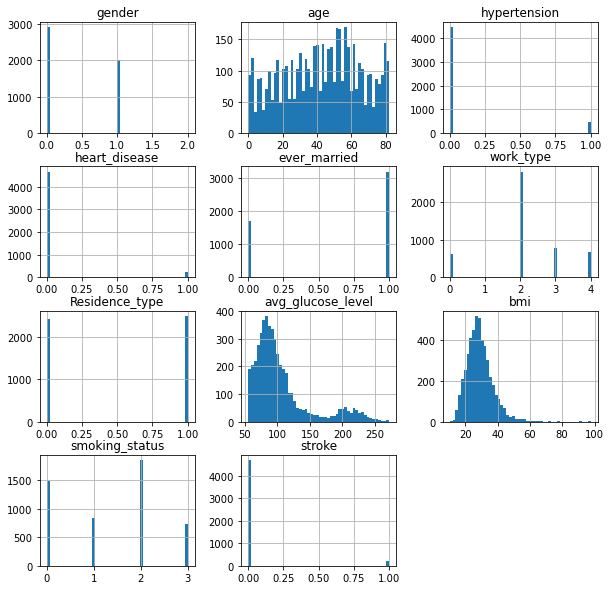

In [572]:
data.hist(bins=50, figsize=(10,10))
plt.show()

In [573]:
#ПОСТРОЕНИЕ КОРРЕЛЯЦИОННОЙ МАТРИЦЫ

In [574]:
corr_matrix = data.corr()
corr_matrix['stroke'].sort_values()

work_type           -0.033756
Residence_type       0.006031
gender               0.006757
bmi                  0.042374
smoking_status       0.051558
ever_married         0.105089
heart_disease        0.137938
avg_glucose_level    0.138936
hypertension         0.142515
age                  0.232331
stroke               1.000000
Name: stroke, dtype: float64

In [575]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


In [576]:
#ФОРМИРОВАНИЕ ФИЧ И ТАРГЕТА, УДАЛЕНИЕ СТОЛБЦОВ СЛАБОКОРРЕЛИРУЮЩИХ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ 
#(НЕ ДАЛО УЛУЧШЕНИЙ, ПОЭТОМУ БЫЛО ПРИНЯТО РЕШЕНИЕ ОСТАВИТЬ ИХ, НО ПЕРЕД ОБУЧЕНИЕМ ВОСПОЛЬЗОВАТЬСЯ PCA) 

In [577]:
features = data.drop('stroke', axis = 1)
labels = data['stroke']
features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [578]:
labels

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [579]:
#ПОСТРОЕНИЕ ГРАФИКА РАСПРЕДЕЛЕНИЯ ОБРАЗЦОВ В ДАТАСЕТЕ 

In [580]:
scaler = StandardScaler()
features_sc = scaler.fit_transform(features)

In [581]:
pca = PCA(n_components=2)
features_sc_pca = pca.fit_transform(features_sc)
features_sc_pca

array([[ 2.48834322,  3.76639145],
       [ 2.25325885,  2.46455648],
       [ 1.53363058, -0.55983749],
       ...,
       [-0.05289912, -0.77371936],
       [ 0.4686098 ,  1.02973935],
       [ 0.38547527, -1.23105346]])

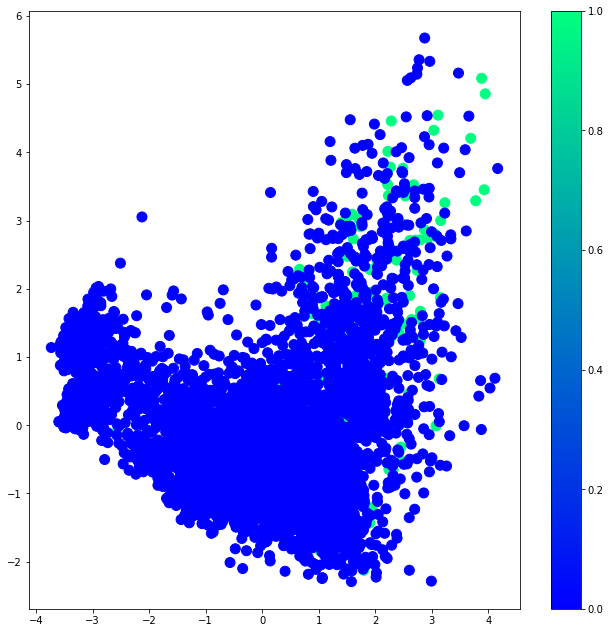

In [582]:
x = features_sc_pca[:, 0]
y = features_sc_pca[:, 1]
z = labels
plt.figure(figsize=(11,11))
cm = plt.get_cmap('winter')
sc = plt.scatter(x, y, c=z, cmap=cm, s=100)
plt.colorbar(sc)
plt.show()

In [583]:
#РАЗБИЕНИЕ ДАННЫХ НА ОБУЧЕНИЕ И ТЕСТ

In [584]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.2, random_state=42)

In [585]:
#ЕЩЕ ОДНО РАЗБИЕНИЕ ОБУЧЕНИЯ ДЛЯ ТЕСТИРОВАНИЯ МОДЕЛЕЙ

In [586]:
X_train_mini, X_test_mini, y_train_mini, y_test_mini = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [587]:
#ПОИСК МОДЕЛЕЙ ПОД F1 SCORE

In [588]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
svc=SVC()
mlpc=MLPClassifier()

In [589]:
alg=[lg,dt,rf,nb,knn,xgb,sgd,svc,mlpc]

In [590]:
for i in alg:
    i.fit(X_train_mini, y_train_mini)
    y_pred = i.predict(X_test_mini) 
    score=f1_score(y_test_mini, y_pred)
    print(score,i)

0.05714285714285715 LogisticRegression()
0.14925373134328357 DecisionTreeClassifier()
0.0 RandomForestClassifier()
0.19117647058823528 GaussianNB()
0.054054054054054064 KNeighborsClassifier()
0.186046511627907 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
0.2626262626262626 SGDClassifier()
0.0 SVC()
0.05882352941176471 MLPClassifi

In [591]:
# GaussianNB


In [592]:
#ПОИСК ЛУЧШЕГО ЗНАЧЕНИЯ ПАРАМЕТРА n_components ДЛЯ PCA (6)

In [593]:
scaler2 = StandardScaler()
X_train_new = scaler2.fit_transform(X_train_mini)
X_test_new = scaler2.transform(X_test_mini)

for i in range(6, 11):
    pca2 = PCA(n_components=i)
    X_train_new2 = pca2.fit_transform(X_train_new)
    X_test_new2 = pca2.transform(X_test_new)
    nb.fit(X_train_new2, y_train_mini)
    y_pred_test=nb.predict(X_test_new2)
    print(F"{i} components:")
    print(f1_score(y_test_mini, y_pred_test))

#6 components

6 components:
0.2247191011235955
7 components:
0.1896551724137931
8 components:
0.21238938053097342
9 components:
0.21052631578947367
10 components:
0.1981981981981982


In [594]:
#ИТОГОВАЯ МОДЕЛЬ

In [595]:
clf_res = Pipeline([('SS', StandardScaler()), ('PCA', PCA(n_components=6)), ('classifier', GaussianNB())])

In [596]:
clf_res.fit(X_train, y_train)

Pipeline(steps=[('SS', StandardScaler()), ('PCA', PCA(n_components=6)),
                ('classifier', GaussianNB())])

In [597]:
y_pred_res = clf_res.predict(X_test)

In [598]:
print(f1_score(y_test, y_pred_res))

0.20168067226890757


In [599]:
confusion_res = confusion_matrix(y_test, y_pred_res)
print("Confusion matrix:\n{}".format(confusion_res))

Confusion matrix:
[[875  65]
 [ 30  12]]


In [600]:
print(classification_report(y_test, y_pred_res, target_names=["No stroke", "Stroke"]))

              precision    recall  f1-score   support

   No stroke       0.97      0.93      0.95       940
      Stroke       0.16      0.29      0.20        42

    accuracy                           0.90       982
   macro avg       0.56      0.61      0.58       982
weighted avg       0.93      0.90      0.92       982



In [601]:
# saving the model
import pickle
with open(r'C:\Users\kgayvoronskiy\webapp\model\model_stroke.pkl','wb') as file:
    pickle.dump(clf_res, file)